# Quasi-Newton Methods: BFGS and L-BFGS on RosenBrock


In [3]:
import numpy as np
import os, sys
os.chdir("..")
sys.path.append(os.getcwd())



from optimizers.quasi_newton import BFGS, LBFGS
from optimizers.line_search import BacktrackingLineSearch
from utils.test_functions import Rosenbrock
from utils.plot_helpers import plot_contour_comparison


## Setup BFGS Optimizer

BFGS requires BacktrackingLineSearch.


In [4]:
line_search = BacktrackingLineSearch(alpha_init=1.0, beta=0.5, c1=1e-4)
bfgs_optimizer = BFGS(line_search=line_search)


## Run BFGS on Rosenbrock Function It has a global minimum at (1, 1).


In [5]:
initial_point = np.array([-1.5, 2.0])

print(f"Starting optimization from point: {initial_point}")
print(f"Initial function value: {Rosenbrock(initial_point):.6f}")


result = bfgs_optimizer.optimize(
    x=initial_point,
    func_callback=Rosenbrock,
    grad_func_callback=Rosenbrock.grad,
    hessian_func_callback=Rosenbrock.hessian,
    is_plot=True
)

if isinstance(result, tuple):
    final_solution, path = result
    print(f"\nOptimization completed!")
    print(f"Final solution: {final_solution}")
    print(f"Final function value: {Rosenbrock(final_solution):.6f}")
    print(f"Number of iterations: {bfgs_optimizer.num_iter}")
    print(f"Number of path points: {len(path)}")
else:
    final_solution = result
    print(f"\nOptimization completed!")
    print(f"Final solution: {final_solution}")
    print(f"Final function value: {Rosenbrock(final_solution):.6f}")
    path = [initial_point, final_solution]


Starting optimization from point: [-1.5  2. ]
Initial function value: 6.875000

Optimization completed!
Final solution: [1. 1.]
Final function value: 0.000000
Number of iterations: 0
Number of path points: 24


## BFGS Optimization Path


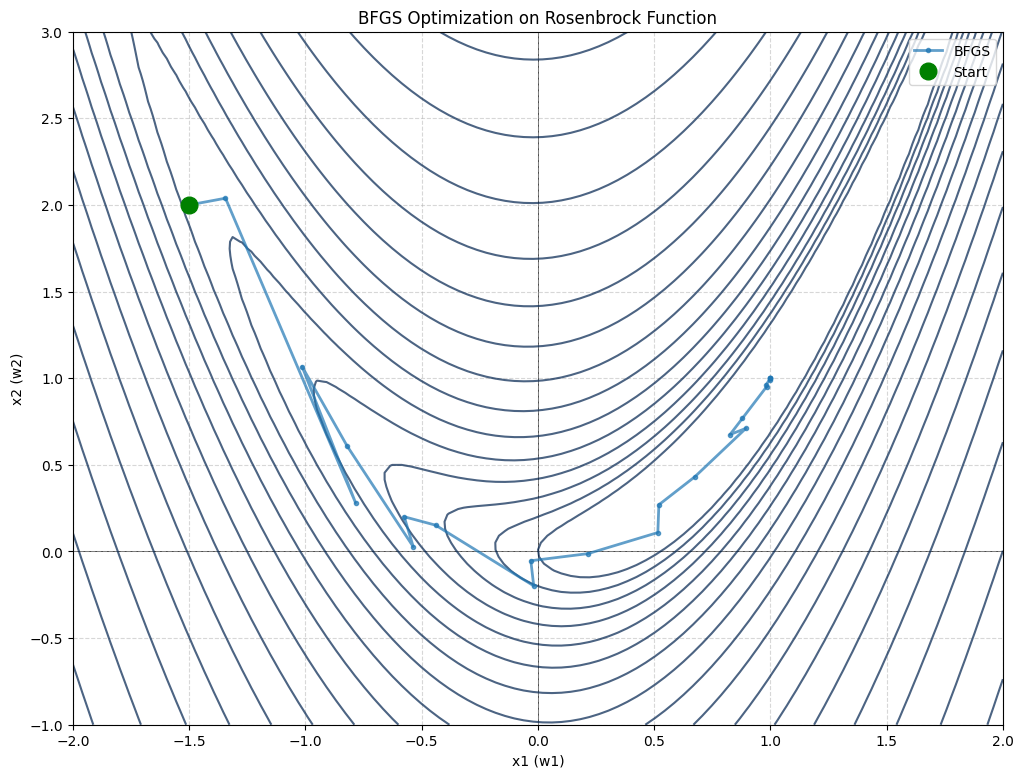

In [ ]:
plot_contour_comparison(
    func_callable=Rosenbrock,
    histories={"BFGS": path},
    x_range=(-2, 2),
    y_range=(-1, 3),
    title="BFGS Optimization on Rosenbrock Function"
)


## Setup L-BFGS Optimizer

L-BFGS (Limited-memory BFGS) is a memory-efficient variant of BFGS that stores only a limited history of gradient differences.


In [7]:
lbfgs_optimizer = LBFGS(line_search=line_search, m=10)


## Run L-BFGS on Rosenbrock Function

Running L-BFGS from the same starting point for comparison with BFGS.


In [8]:
print(f"Starting L-BFGS optimization from point: {initial_point}")
print(f"Initial function value: {Rosenbrock(initial_point):.6f}")


result_lbfgs = lbfgs_optimizer.optimize(
    x=initial_point.copy(),
    func_callback=Rosenbrock,
    grad_func_callback=Rosenbrock.grad,
    hessian_func_callback=Rosenbrock.hessian,
    is_plot=True
)


if isinstance(result_lbfgs, tuple):
    final_solution_lbfgs, path_lbfgs = result_lbfgs
    print(f"\nL-BFGS Optimization completed!")
    print(f"Final solution: {final_solution_lbfgs}")
    print(f"Final function value: {Rosenbrock(final_solution_lbfgs):.6f}")
    print(f"Number of iterations: {lbfgs_optimizer.num_iter}")
    print(f"Number of path points: {len(path_lbfgs)}")
else:
    final_solution_lbfgs = result_lbfgs
    print(f"\nL-BFGS Optimization completed!")
    print(f"Final solution: {final_solution_lbfgs}")
    print(f"Final function value: {Rosenbrock(final_solution_lbfgs):.6f}")
    path_lbfgs = [initial_point, final_solution_lbfgs]


Starting L-BFGS optimization from point: [-1.5  2. ]
Initial function value: 6.875000

L-BFGS Optimization completed!
Final solution: [0.99999993 0.99999987]
Final function value: 0.000000
Number of iterations: 0
Number of path points: 27


## L-BFGS Optimization Path


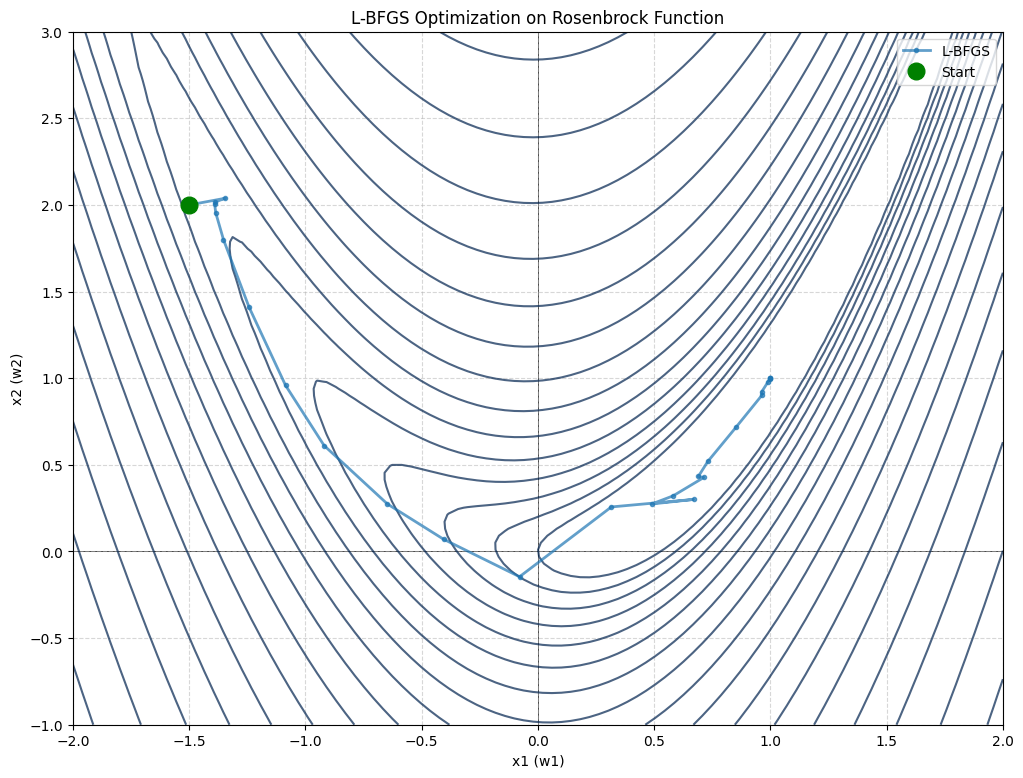

In [9]:

plot_contour_comparison(
    func_callable=Rosenbrock,
    histories={"L-BFGS": path_lbfgs},
    x_range=(-2, 2),
    y_range=(-1, 3),
    title="L-BFGS Optimization on Rosenbrock Function"
)

## Comparision BFGS and L-BFGS


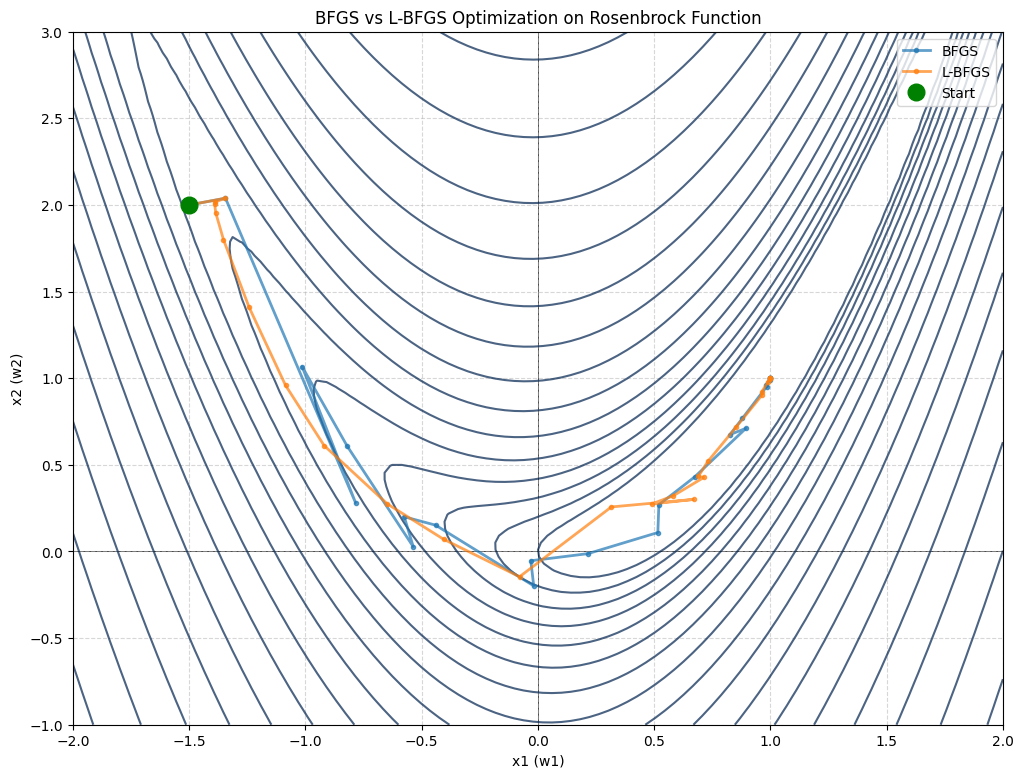

In [ ]:
plot_contour_comparison(
    func_callable=Rosenbrock,
    histories={"BFGS": path, "L-BFGS": path_lbfgs},
    x_range=(-2, 2),
    y_range=(-1, 3),
    title="BFGS vs L-BFGS Optimization on Rosenbrock Function"
)